In [1]:
#importing the basic library for EDA

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [2]:
#Reading the processed Adult data file where only ategorical variable not encoded

df = pd.read_csv('https://raw.githubusercontent.com/ayan3b/DATASET/main/ADULT/Adult_without_encoder_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        32537 non-null  int64  
 1   age               32537 non-null  int64  
 2   workclass         32537 non-null  object 
 3   fnlwgt            32537 non-null  int64  
 4   education         32537 non-null  object 
 5   education-num     32537 non-null  int64  
 6   marital-status    32537 non-null  object 
 7   occupation        32537 non-null  object 
 8   relationship      32537 non-null  object 
 9   race              32537 non-null  object 
 10  sex               32537 non-null  object 
 11  capital-gain      32537 non-null  int64  
 12  capital-loss      32537 non-null  int64  
 13  hours-per-week    32537 non-null  int64  
 14  native-country    32537 non-null  object 
 15  income            32537 non-null  object 
 16  income_binary     32537 non-null  int64 

In [4]:
df.head()


,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,...,hours-per-week,native-country,income,income_binary,age_s,fnlwgt_s,education_num_s,capital_gain_s,capital_loss_s,hours_per_week_s
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,...,40,United-States,<=50K,0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,...,13,United-States,<=50K,0,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,...,40,United-States,<=50K,0,-0.042936,0.245040,-0.420679,-0.145975,-0.216743,-0.035664
3,3,53,Private,234721,HS-grad,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,...,40,United-States,<=50K,0,1.056950,0.425752,-1.198407,-0.145975,-0.216743,-0.035664
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,...,40,Cuba,<=50K,0,-0.776193,1.408066,1.134777,-0.145975,-0.216743,-0.035664


In [5]:
# Checking the null value presence
df.isnull().sum()

Unnamed: 0          0
age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country      0
income              0
income_binary       0
age_s               0
fnlwgt_s            0
education_num_s     0
capital_gain_s      0
capital_loss_s      0
hours_per_week_s    0
dtype: int64

In [6]:
# Ordinal encoding o education object
def education_ordinal_encoding(val):
  if val == 'Preschool':
    return 1
  elif val == 'School':
    return 2
  elif val == 'HS-grad':
    return 3
  elif val == 'AssociateLevel':
    return 4
  elif val == 'Bachelors':
    return 5
  elif val == 'Masters':
    return 6
  elif val == 'Prof-school':
    return 7
  elif val == 'Doctorate':
    return 8
  else :
    return 0

In [7]:
df['education_e'] = df.education.apply(lambda x : education_ordinal_encoding(x))

df[['education','education_e']].head()

,education,education_e
0,Bachelors,5
1,Bachelors,5
2,HS-grad,3
3,HS-grad,3
4,Bachelors,5


## encoding on the categorical attributes One Hot encoding

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
# Selecting the columns to be one-hot encoded
columns_to_encode = ['workclass', 'occupation','relationship','marital-status','race','sex']

# Creating a DataFrame with only the selected columns
df_categorical = df[columns_to_encode]

# Creating an instance of OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the selected categorical columns
encoded_columns = encoder.fit_transform(df_categorical).toarray()

# Creating a DataFrame from the encoded columns
df_encoded = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

# Concatenating the encoded DataFrame with the original DataFrame, dropping the original categorical columns
#df = pd.concat([df, df_encoded], axis=1).drop(columns=columns_to_encode)

df_encoded_for_xgboost = pd.concat([df, df_encoded], axis=1)

# Display the updated DataFrame
df_encoded_for_xgboost.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,...,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,race_Black,race_Other,race_White,sex_Female,sex_Male
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3,53,Private,234721,HS-grad,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [10]:
df_encoded_for_xgboost.groupby(['sex_Female']).agg({'income' : 'count'})


,income
sex_Female,
0.0,21775
1.0,10762


In [11]:
df_encoded_for_xgboost.groupby(['sex_Male']).agg({'income' : 'count'})

,income
sex_Male,
0.0,10762
1.0,21775


In [12]:
df_encoded_for_xgboost.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,...,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,race_Black,race_Other,race_White,sex_Female,sex_Male
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3,53,Private,234721,HS-grad,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [14]:
df_encoded_for_xgboost.isnull().sum().sort_values(ascending=False)

Unnamed: 0                    0
relationship_Not-in-family    0
occupation_Craft-repair       0
occupation_Exec-managerial    0
occupation_Farming-fishing    0
                             ..
workclass_Private             0
workclass_Self-emp-inc        0
workclass_Self-emp-not-inc    0
workclass_State-gov           0
sex_Male                      0
Length: 66, dtype: int64

In [15]:
df_encoded_for_xgboost.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income', 'income_binary', 'age_s', 'fnlwgt_s',
       'education_num_s', 'capital_gain_s', 'capital_loss_s',
       'hours_per_week_s', 'education_e', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'workclass_undefined',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupat

In [16]:
list_of_x_column = ['age_s', 'fnlwgt_s',
       'education_num_s', 'capital_gain_s', 'capital_loss_s',
       'hours_per_week_s', 'education_e', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'workclass_undefined',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'occupation_undefined', 'relationship_Husband',
       'relationship_Not-in-family', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed', 'race_Black',
       'race_Other', 'race_White', 'sex_Female', 'sex_Male']

In [17]:
y_column = ['income', 'income_binary']

##  XGBOOST Model Build

In [58]:
# target variable and input features has been splited into two different dataframe

col_list = [x for x in df_encoded_for_xgboost.columns if x != 'income_binary']
col_list


['Unnamed: 0',
 'age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income',
 'age_s',
 'fnlwgt_s',
 'education_num_s',
 'capital_gain_s',
 'capital_loss_s',
 'hours_per_week_s',
 'education_e',
 'workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'workclass_undefined',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Protective-serv',
 'occupation_Sales',
 'occupation_Tech-support',
 'occupation_Transport-moving',
 'occu

In [59]:
X = df_encoded_for_xgboost[col_list]
y = df_encoded_for_xgboost['income_binary']

In [60]:
# Traiin test split of dataframe

from sklearn.model_selection import train_test_split

# Splitting data into train and test set 70:30
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [61]:
# Putting feature variables into X
X_train = X_train_split[list_of_x_column]
print("the shape of X_train datafrae :",X_train.shape)

X_test = X_test_split[list_of_x_column]
print("the shape of X_test datafrae :",X_test.shape)

# Putting target variable to y
y_train = y_train_split
print("the shape of y_train datafrae :",y_train.shape)

y_test = y_test_split
print("the shape of y_test datafrae :",y_test.shape)

the shape of X_train datafrae : (22775, 49)
the shape of X_test datafrae : (9762, 49)
the shape of y_train datafrae : (22775,)
the shape of y_test datafrae : (9762,)


In [62]:
# Importing XGBoost
from xgboost import XGBClassifier

# Importing libraries for cross validation- Hyperparameter Tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [63]:
# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1, 0.2, 0.4, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=4, n_estimators=150)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=4,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=150,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.4, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [64]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.429871,0.005040,0.030792,0.001741,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.921867,0.923415,0.924190,0.923157,0.000966,5,0.939262,0.939219,0.937144,0.938542,0.000989
1,0.468836,0.064412,0.040495,0.013744,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.924755,0.925787,0.927601,0.926048,0.001176,3,0.941955,0.942249,0.940597,0.941600,0.000720
2,1.438199,1.457452,0.032303,0.000160,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",0.925261,0.926620,0.928162,0.926681,0.001185,2,0.943174,0.943503,0.941185,0.942621,0.001024
3,0.432036,0.019192,0.032020,0.001331,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.918172,0.920383,0.921751,0.920102,0.001475,7,0.947814,0.946633,0.946341,0.946929,0.000637
4,0.424298,0.012603,0.031533,0.000092,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.923206,0.924752,0.926007,0.924655,0.001146,4,0.953430,0.953000,0.951779,0.952736,0.000699
5,0.417594,0.035064,0.033249,0.001412,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.925733,0.927288,0.928549,0.927190,0.001152,1,0.953908,0.953848,0.952626,0.953461,0.000591
6,0.426992,0.018977,0.032058,0.001573,0.4,0.3,"{'learning_rate': 0.4, 'subsample': 0.3}",0.907330,0.908571,0.912841,0.909581,0.002361,11,0.952931,0.951490,0.951645,0.952022,0.000646
7,0.433276,0.017494,0.031554,0.000927,0.4,0.6,"{'learning_rate': 0.4, 'subsample': 0.6}",0.913470,0.917385,0.919214,0.916690,0.002396,8,0.964115,0.963822,0.961658,0.963198,0.001095
8,1.582266,1.663179,0.033249,0.002667,0.4,0.9,"{'learning_rate': 0.4, 'subsample': 0.9}",0.919617,0.923349,0.922305,0.921757,0.001572,6,0.967676,0.967057,0.966758,0.967164,0.000382
9,0.434166,0.008461,0.031711,0.001236,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.899468,0.893848,0.898012,0.897109,0.002381,12,0.951064,0.950743,0.950408,0.950738,0.000268


In [65]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [66]:
params = {'learning_rate': 0.2,
          'max_depth': 4,
          'n_estimators':150,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_lbl_encoder_model = XGBClassifier(params = params)
xgb_lbl_encoder_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 150,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

In [67]:
# Predictions on the train set
y_train_pred = xgb_lbl_encoder_model.predict(X_train)

In [68]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[16582   711]
 [ 1368  4114]]


In [69]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [70]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9087156970362239
Sensitivity:- 0.7504560379423568
Specificity:- 0.9588850980165384
F1-Score:- 0.7982924226254002


In [71]:
# Predicted probability
y_train_pred_proba_xgb_lbl_encoder = xgb_lbl_encoder_model.predict_proba(X_train)[:,1]

In [72]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_xgb_lbl_encoder)
auc

0.9652551935899392

In [73]:
# ROC Curve function
import matplotlib.pyplot as plt

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

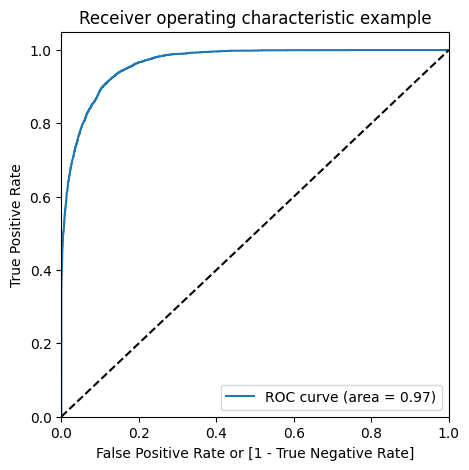

In [74]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_xgb_lbl_encoder)

## Need to check along with accuracy what is fairness KPI says

In [75]:
# Predictions on the train set
y_test_pred = xgb_lbl_encoder_model.predict(X_test)

In [76]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6914  491]
 [ 812 1545]]


In [77]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [78]:
# Accuracy on the test dataset
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.8665232534316738
Sensitivity:- 0.6554942723801442
Specificity:- 0.9336934503713707
F1-Score:- 0.7033917596175734


training data have F1 score 80% but on the test data F1 score dropped to 70%

In [79]:
df_measure_fair = pd.concat([X_test_split, y_test], axis=1)

df_measure_fair = df_measure_fair.reset_index(drop=True)
df_measure_fair.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,...,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,race_Black,race_Other,race_White,sex_Female,sex_Male,income_binary
0,3643,31,State-gov,33308,AssociateLevel,11,Married-civ-spouse,Craft-repair,Husband,White,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
1,16042,24,Federal-gov,130534,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
2,9404,60,Local-gov,98350,Bachelors,10,Married-civ-spouse,Other-service,Husband,Other,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,17910,31,Private,398988,Bachelors,10,Never-married,Exec-managerial,Not-in-family,White,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
4,5200,43,Federal-gov,144778,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1


In [80]:
df_measure_fair.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income', 'age_s', 'fnlwgt_s', 'education_num_s',
       'capital_gain_s', 'capital_loss_s', 'hours_per_week_s', 'education_e',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'workclass_undefined',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
     

In [81]:
y_test_pred.shape

(9762,)

In [82]:
y_test_pred[0:10,]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [83]:
#convertin numpy array to dataframe
data = y_test_pred
df_y_test_pred = pd.DataFrame(data = data[0:,],
                              index=[i for i in range(data.shape[0])],
                              columns = ['income_binary_pred']
                              )
df_y_test_pred.head(10)

,income_binary_pred
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1


In [84]:
df_measure_fair = pd.concat([df_measure_fair, df_y_test_pred], axis=1)

df_measure_fair.head(10)

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,...,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,race_Black,race_Other,race_White,sex_Female,sex_Male,income_binary,income_binary_pred
0,3643,31,State-gov,33308,AssociateLevel,11,Married-civ-spouse,Craft-repair,Husband,White,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0
1,16042,24,Federal-gov,130534,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0
2,9404,60,Local-gov,98350,Bachelors,10,Married-civ-spouse,Other-service,Husband,Other,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
3,17910,31,Private,398988,Bachelors,10,Never-married,Exec-managerial,Not-in-family,White,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0
4,5200,43,Federal-gov,144778,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0
5,28785,50,Private,150975,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,Other,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0
6,4638,66,State-gov,41506,School,6,Divorced,Other-service,Not-in-family,Black,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
7,1487,25,Private,174592,HS-grad,9,Never-married,Other-service,Own-child,White,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0
8,20382,58,Private,354024,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,0
9,9814,45,Private,188950,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1


In [85]:
# replacing the column name
df_measure_fair.columns = df_measure_fair.columns.str.replace('Unnamed: 0', 'Original_rownum')

In [86]:
df_measure_fair.columns

Index(['Original_rownum', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income', 'age_s', 'fnlwgt_s', 'education_num_s',
       'capital_gain_s', 'capital_loss_s', 'hours_per_week_s', 'education_e',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'workclass_undefined',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',


In [87]:
col_list = ['Original_rownum','race','sex','income','income_binary','income_binary_pred']
df_m_f = df_measure_fair[col_list]

def check_rediction_result(val1,val2):
  if val1 == val2:
    return 'R'
  else :
    return 'W'



In [88]:
df_m_f.head()

,Original_rownum,race,sex,income,income_binary,income_binary_pred
0,3643,White,Male,<=50K,0,0
1,16042,White,Male,<=50K,0,0
2,9404,Other,Male,<=50K,0,0
3,17910,White,Male,<=50K,0,0
4,5200,White,Male,>50K,1,0


In [89]:
df_m_f.isnull().sum()

Original_rownum       0
race                  0
sex                   0
income                0
income_binary         0
income_binary_pred    0
dtype: int64

In [90]:
df_m_f.groupby(['race','sex']).agg({'Original_rownum': 'count'})

Original_rownum
race  sex                    
Black Female              482
      Male                456
Other Female              161
      Male                302
White Female             2544
      Male               5817

## Intersectional Sufficiency Metric

Identify the relevant demographic attributes (e.g., race, gender)

Measure the classification accuracy separately for each intersectional group by comparing the predicted and actual labels.

Develop a metric that combines accuracy across all groups, considering both overall accuracy and accuracy within each intersectional subgroup.

Utilize Python and relevant libraries (e.g., scikit-learn) to implement the calculation of Intersectional Sufficiency based on the defined metric.


In [91]:
from sklearn.metrics import accuracy_score

def calculate_intersectional_sufficiency(df, intersectional_groups):
    intersectional_sufficiency_scores = []

    # Iterate over each intersectional group
    for group in intersectional_groups:
        # Create a mask for the current intersectional group
        mask = (df['race'] == group[0]) & (df['sex'] == group[1])

        # Extract actual and predicted results for the current group
        actual_results = df.loc[mask, 'income_binary']
        predicted_results = df.loc[mask, 'income_binary_pred']

        # Calculate accuracy for the current group
        accuracy = accuracy_score(actual_results, predicted_results)

        # Append accuracy to the list
        intersectional_sufficiency_scores.append(accuracy)

    # Calculate the overall Intersectional Sufficiency metric
    overall_sufficiency = sum(intersectional_sufficiency_scores) / len(intersectional_sufficiency_scores)
    print(intersectional_sufficiency_scores)
    return overall_sufficiency



In [92]:
# Define your DataFrame df1
# For example:
# df1 = pd.DataFrame({'race': [...], 'sex': [...], 'actual_result': [...], 'predicted_result': [...]})

# Define the intersectional groups based on race and sex
intersectional_groups = [('Black', 'Female'), ('Black', 'Male'), ('White', 'Female'), ('White', 'Male'),('Other', 'Female'), ('Other', 'Male')]

# Calculate Intersectional Sufficiency
intersectional_sufficiency = calculate_intersectional_sufficiency(df_m_f, intersectional_groups)

print(f'Intersectional Sufficiency groups: {intersectional_groups}')

print(f'Intersectional Sufficiency Metric: {intersectional_sufficiency}')

#print(f'Intersectional Sufficiency individual group Metric: {iS_individual_group_scores}')

[0.9481327800829875, 0.8837719298245614, 0.9339622641509434, 0.828090080797662, 0.9316770186335404, 0.847682119205298]
Intersectional Sufficiency groups: [('Black', 'Female'), ('Black', 'Male'), ('White', 'Female'), ('White', 'Male'), ('Other', 'Female'), ('Other', 'Male')]
Intersectional Sufficiency Metric: 0.8955526987824988


## XAI technique to understand on the test data what features has been used for prediction

In [93]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 11.0 MB/s eta 0:00:00


In [94]:
import shap

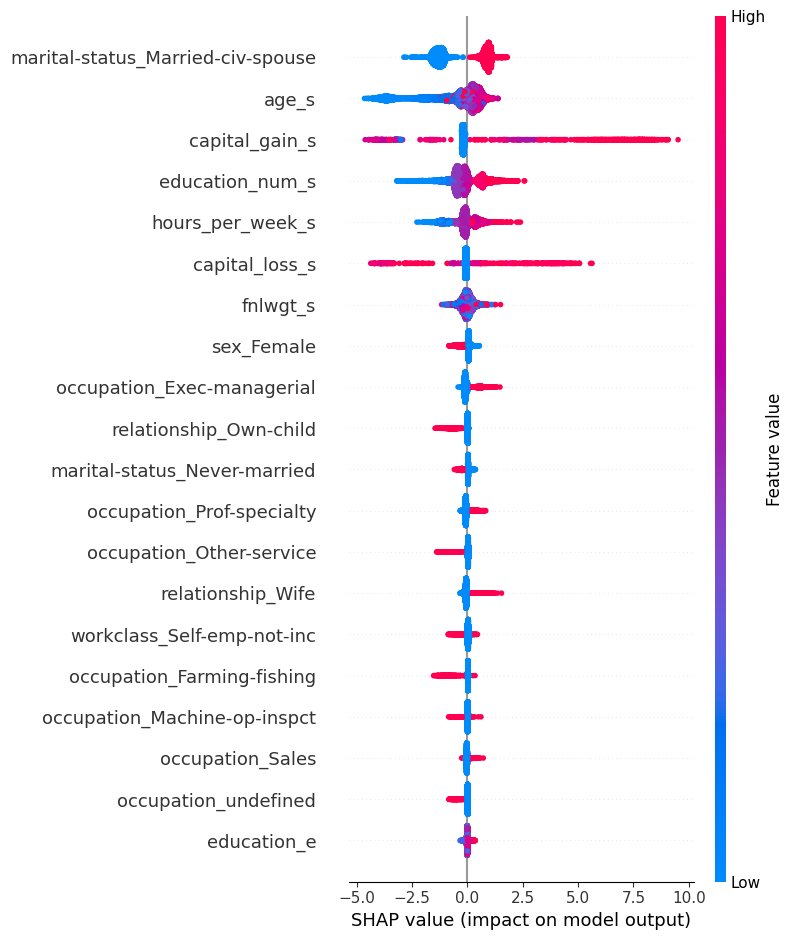

In [95]:
# Assuming you have a trained XGBoost model named xgb_model1 and your input data is in X_test
# Make sure your X_test is a pandas DataFrame or a NumPy array

# Create a SHAP explainer using the XGBoost model
explainer = shap.Explainer(xgb_lbl_encoder_model)

# Calculate SHAP values for a subset of the data (you can adjust the number of samples)
shap_values = explainer.shap_values(X_test)

# Plot summary plot (summary_plot) to visualize feature importances
shap.summary_plot(shap_values, X_test, show = False)

In [96]:
df_m_f[(df_m_f.race == 'Black') & ~(df_m_f.income_binary == df_m_f.income_binary_pred)].head()

,Original_rownum,race,sex,income,income_binary,income_binary_pred
361,16701,Black,Male,>50K,1,0
610,10425,Black,Male,<=50K,0,1
898,457,Black,Male,<=50K,0,1
932,29008,Black,Female,>50K,1,0
1040,25885,Black,Male,>50K,1,0


In [97]:
X_test_split[list_of_x_column][(X_test_split['Unnamed: 0'] == 16701)]

,age_s,fnlwgt_s,education_num_s,capital_gain_s,capital_loss_s,hours_per_week_s,education_e,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,race_Black,race_Other,race_White,sex_Female,sex_Male
16695,-0.116262,0.459762,-0.420679,-0.145975,-0.216743,-0.359637,3,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
X_test.iloc[16695,]

IndexError: ignored

In [ ]:
# If you want to visualize the impact of a single prediction, you can use force_plot
# Select a specific instance (change the index accordingly)
shap.initjs()
instance_index = 16695
shap.force_plot(explainer.expected_value, shap_values[instance_index, :], X_test.iloc[instance_index, :], show=False)